In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad, quad_vec

# Question 1

In [2]:
time, temp = np.loadtxt('data/temperature_data.csv', skiprows=1).T

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


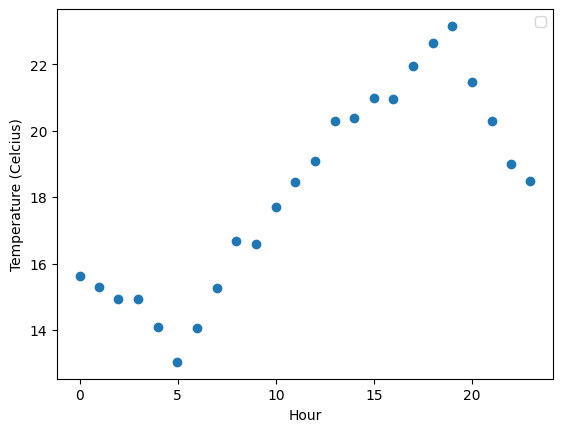

In [3]:
plt.scatter(time, temp)
plt.xlabel('Hour')
plt.ylabel('Temperature (Celcius)')
plt.legend()

## Part A

In [4]:
interplinear_f = interp1d(time, temp, kind='linear')
interplinear_f(12.14)

array(19.248)

## Part B

In [5]:
interpcubic_f = interp1d(time, temp, kind='cubic')
interpcubic_f(12.14)

array(19.24715706)

## Part C

In [6]:
t1 = 5
t2 = 10
1/(t2-t1) * quad(interpcubic_f, t1, t2)[0]

15.569531568713234

# Question 2

Open all data

In [7]:
energydensity_data, density_data = np.loadtxt('data/photon_spectrum.csv').T
energyattenuation_data, attenuation_data = np.loadtxt('data/lead_atteunation.csv', delimiter=',').T

In [8]:
interp_density_f = interp1d(energydensity_data, density_data, kind='cubic')
interp_attenuation_f = interp1d(energyattenuation_data, attenuation_data, kind='cubic')

In [9]:
xdensity_interp = np.linspace(min(energydensity_data), max(energydensity_data), 1000)
ydensity_interp = interp_density_f(xdensity_interp)
xatt_interp = np.linspace(min(energyattenuation_data), max(energyattenuation_data), 1000)
yatt_interp = interp_attenuation_f(xatt_interp)

[]

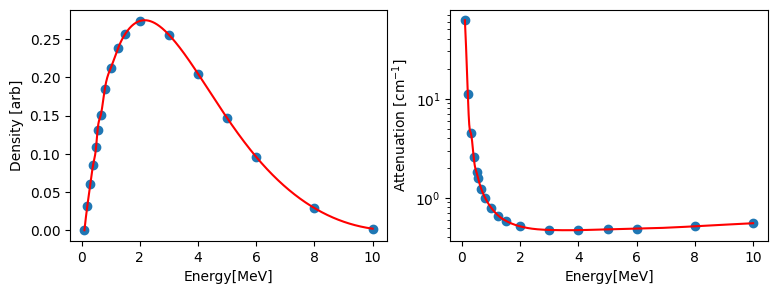

In [10]:
plt.subplots(1,2,figsize=(9,3))
plt.subplot(121)
plt.scatter(energydensity_data, density_data)
plt.plot(xdensity_interp, ydensity_interp, color='r')
plt.xlabel('Energy[MeV]')
plt.ylabel('Density [arb]')
plt.subplot(122)
plt.scatter(energyattenuation_data, attenuation_data)
plt.plot(xatt_interp, yatt_interp, color='r')
plt.xlabel('Energy[MeV]')
plt.ylabel('Attenuation [cm$^{-1}$]')
plt.semilogy()

## Part A

In [11]:
numerator = quad(lambda E: E*interp_density_f(E), min(energydensity_data), max(energydensity_data))[0]
denominator = quad(lambda E: interp_density_f(E), min(energydensity_data), max(energydensity_data))[0]

In [12]:
numerator/denominator

3.3825472782623387

## Part B

In [18]:
def numerator_integrand(E, x):
    return E * interp_density_f(E) * np.exp(-x*interp_attenuation_f(E))

def denominator_integrand(E, x):
    return interp_density_f(E) * np.exp(-x*interp_attenuation_f(E))

In [19]:
x = 2
numerator = quad(numerator_integrand, min(energydensity_data), max(energydensity_data), args=(x,))[0]
denominator = quad(denominator_integrand, min(energydensity_data), max(energydensity_data), args=(x,))[0]

In [20]:
numerator/denominator

3.644194686391638

## Part C

In [21]:
xs = np.linspace(0, 5, 100)
numerators = quad_vec(numerator_integrand, min(energydensity_data), max(energydensity_data), args=(xs,))[0]
denominators = quad_vec(denominator_integrand, min(energydensity_data), max(energydensity_data), args=(xs,))[0]
mean_energies = numerators/denominators

Text(0, 0.5, 'Mean Energy of Photons in Beam [MeV]')

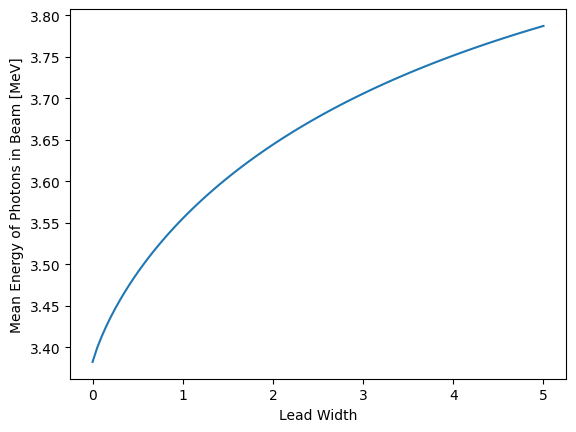

In [22]:
plt.plot(xs, mean_energies)
plt.xlabel('Lead Width')
plt.ylabel('Mean Energy of Photons in Beam [MeV]')

As you can see, the mean energy of the beam increases after moving through lead (to be expected, more of the lower energy photons get atteunated in the lead than the upper ones do). Note there is still less overall photons in the beam after moving through lead, its just that the energy of the remaining ones is higher on average